# Install dependencies

* IMPORTANT: you only need to run this one time, when you first spin up your docker notebook server
* IMPORTANT: you need to restart the kernel after you run this
* TODO: these deps should be eventually put into a dockerfile

* INFO: read more about [what the hell is pip](https://pip.pypa.io/en/stable/) and [why installing dependencies via pip in a notebook is a stupid idea, but OK since we are prototyping here](https://towardsdev.com/pip-install-from-jupyter-notebook-485c218b50b)

In [ ]:
!pip install pandas
!pip install datasets

# Import libraries

also setup the data directory

In [1]:
import os
import re
import glob
import shutil
import string
import pathlib


# set the data directory
data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','data'))

# give matplotlib a folder to save its configs
os.environ['MPLCONFIGDIR'] = os.path.join(data_dir,'plt_configs')
import matplotlib.pyplot as plt

#give huggingface a folder to save its stuff in too
#you only need this if you are using a huggingface dataset
os.environ['HF_HOME'] = os.path.join(data_dir,'hf_cache')
import datasets

import PIL
import PIL.Image

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.layers import TextVectorization

In [4]:
# setup directories, create them if they do not exist within data folder

# I want my data directory to contain two folders, one for each class I am predicting ("cats" or "dogs")

animals_dir = os.path.join(data_dir,'animals')
if not os.path.exists(animals_dir):
    os.makedirs(animals_dir)
    
cats_dir = os.path.join(data_dir,'animals','cats')
if not os.path.exists(cats_dir):
    os.makedirs(cats_dir)
    
dogs_dir = os.path.join(data_dir,'animals','dogs')
if not os.path.exists(dogs_dir):
    os.makedirs(dogs_dir)

# Download the data, part 1 "control group" faces from huggingface and inspect the data

* [huggingface datasets quickstart](https://huggingface.co/docs/datasets/quickstart)
* [nielsr/CelebA-faces](https://huggingface.co/datasets/nielsr/CelebA-faces)
* [Know your dataset](https://huggingface.co/docs/datasets/access)

In [5]:
# Load the dataset
dataset = datasets.load_dataset("cats_vs_dogs")

Found cached dataset cats_vs_dogs (/tf/data/hf_cache/datasets/cats_vs_dogs/default/1.0.0/d4fe9cf31b294ed8639aa58f7d8ee13fe189011837038ed9a774fde19a911fcb)


  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Print first 5 records from dataset
animals_dataset = dataset['train'].to_pandas()
animals_dataset.head()

,image,labels
0,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
1,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
2,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
3,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
4,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0


In [31]:
# length of animals dataset
len(animals_dataset)

23410

In [7]:
# divide the dataset into 2 dataframes
cats_df = animals_dataset[animals_dataset['labels'] == 0]
dogs_df = animals_dataset[animals_dataset['labels'] == 1]

# load the mugshat data from the '/data' folder
* [load and preprocess images](https://www.tensorflow.org/tutorials/load_data/images)

In [8]:
# print first 5 records of cats dataset
cats_df.head()

,image,labels
0,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
1,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
2,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
3,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0
4,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",0


In [9]:
# print the path of first data of cats dataset
cats_df['image'][0]['path']

'/tf/data/hf_cache/datasets/downloads/extracted/c4333ea05164292151dda37c31bffe1889dba836e9f80c21a02e1063e61efbea/PetImages/Cat/0.jpg'

In [10]:
# save all cat images into cats directory
for i in range(len(cats_df)):
    shutil.copyfile(cats_df['image'][i]['path'], os.path.join(cats_dir,str(i)+'.jpg'))

In [11]:
# print the count of cat images available in the cat directory
image_count = len(list(pathlib.Path(cats_dir).glob('*.jpg')))
print(image_count)

11741


(492, 500)


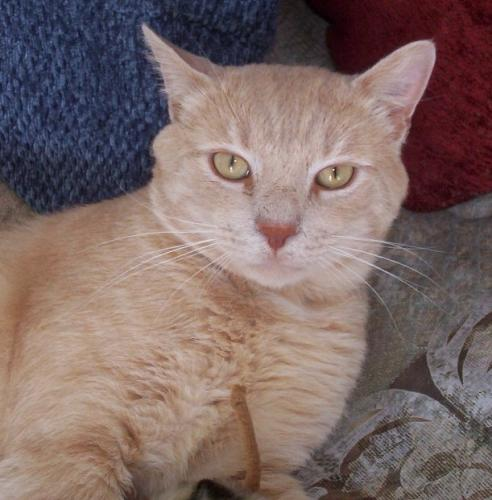

In [12]:
# print the first image from cats directory
cats = list(pathlib.Path(cats_dir).glob('*.jpg'))
print(PIL.Image.open(str(cats[0])).size)
PIL.Image.open(str(cats[0]))

(500, 375)


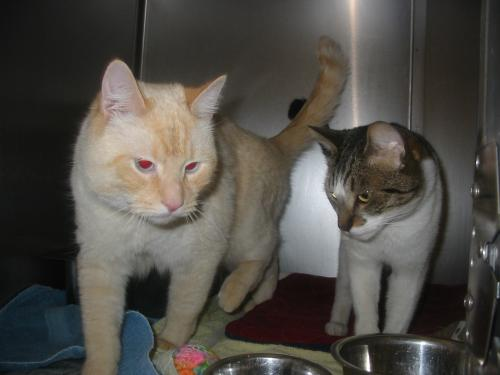

In [13]:
# print the second image from cats directory
print(PIL.Image.open(str(cats[1])).size)
PIL.Image.open(str(cats[1]))

(500, 411)


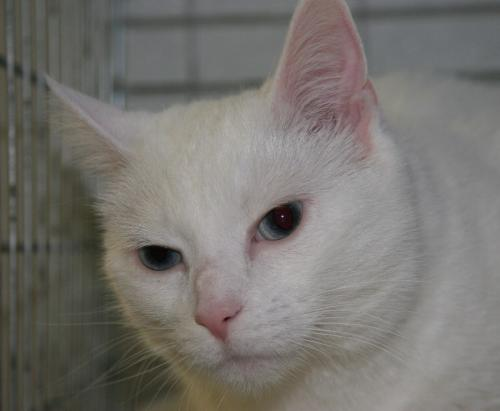

In [14]:
# print the last image from cats directory
print(PIL.Image.open(str(cats[-1])).size)
PIL.Image.open(str(cats[-1]))

In [15]:
# print first 5 records of dogs dataset
dogs_df.head()

,image,labels
11741,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",1
11742,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",1
11743,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",1
11744,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",1
11745,"{'bytes': None, 'path': '/tf/data/hf_cache/dat...",1


In [16]:
# print the path of first data of dogs dataset
dogs_df['image'][11741]['path']

'/tf/data/hf_cache/datasets/downloads/extracted/c4333ea05164292151dda37c31bffe1889dba836e9f80c21a02e1063e61efbea/PetImages/Dog/0.jpg'

In [25]:
# save all dog images into dogs directory
for i in range(len(cats_df),len(animals_dataset)):
    shutil.copyfile(dogs_df['image'][i]['path'], os.path.join(dogs_dir,str(i)+'.jpg'))

In [27]:
# print the count of dog images available in the dog directory
image_count = len(list(pathlib.Path(dogs_dir).glob('*.jpg')))
print(image_count)

11669


(500, 375)


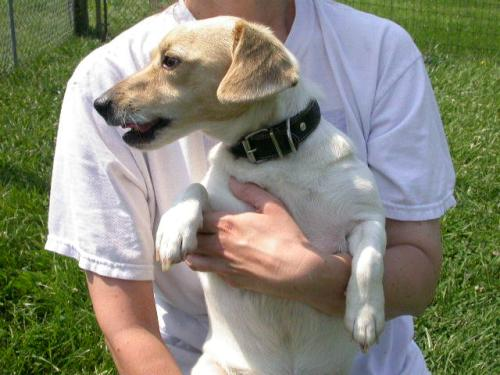

In [29]:
# print the second image from cats directory
print(PIL.Image.open(str(dogs[1])).size)
PIL.Image.open(str(dogs[1]))

(500, 375)


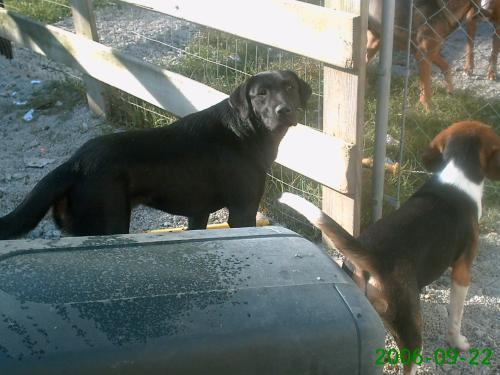

In [28]:
# print the first image from cats directory
dogs = list(pathlib.Path(dogs_dir).glob('*.jpg'))
print(PIL.Image.open(str(dogs[0])).size)
PIL.Image.open(str(dogs[0]))

(500, 375)


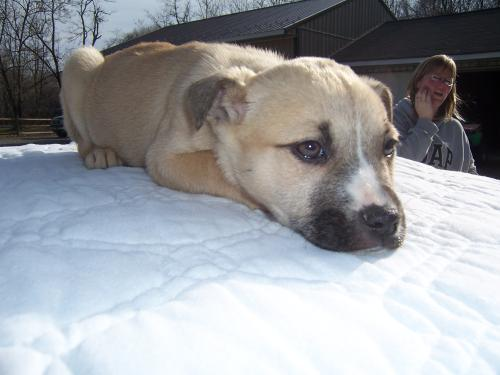

In [30]:
# print the second image from cats directory
print(PIL.Image.open(str(dogs[-1])).size)
PIL.Image.open(str(dogs[-1]))

# Setup Training Set

In [33]:
batch_size = 32 
img_height = 160
img_width = 160

train_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(animals_dir),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(animals_dir),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


In [34]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


# [Standardize and Fit](https://www.tensorflow.org/tutorials/load_data/images#standardize_the_data)

[https://www.tensorflow.org/tutorials/load_data/images#standardize_the_data](https://www.tensorflow.org/tutorials/load_data/images#standardize_the_data)

In [ ]:
plt.figure(figsize=(2, 2))
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

# Save model and test prediction

In [ ]:
# TODO add code here